# In this file we examine the data of $S_{diff}(t)$ as a function of how many initial conditions it's avraged over

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
plt.style.use("seaborn-v0_8-darkgrid")

N_val = 4

num_unit_cells_vals = [32]
num_init_cond_vals = [100, 1_000, 5_000, 10_000]

a_val = 0.65
a_val_name = str(a_val).replace(".", "p")

z_vals = [1.6, 1.7]
z_val_names = [str(z_val).replace(".", "p") for z_val in z_vals]

z_final = 1.6

data_parent_path = f"../data/spin_dists_per_time/N{N_val}/a{a_val_name}/IC1"

In [3]:
os.listdir(data_parent_path)

['.DS_Store', 'L512', 'L32', 'L256', 'L128', 'L64']

In [4]:
s_diffs_per_time = {} # L_val: {initcond: [s_diff(t)]}

for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    print(f"L = {L_val}")
    s_diffs_per_time[L_val] = {}

    final_time = int(L_val ** z_final)

    current_loaded_data = []

    for i, sample_file in enumerate(os.listdir(f"{data_parent_path}/L{L_val}")):
        valid_sample = False
        for z_val_name in z_val_names:
            if z_val_name in sample_file:
                valid_sample = True
        if not valid_sample:
            continue
        
        sample_num = i+1

        sample_file_path = f"{data_parent_path}/L{L_val}/{sample_file}"
        df = pd.read_csv(sample_file_path)

        current_loaded_data.append(df.loc[:99, "delta_s"])

        if sample_num in num_init_cond_vals:
            print(f"L = {L_val} | Reached {sample_num}/{max(num_init_cond_vals)} sample")
            s_diffs_per_time[L_val][sample_num] = np.mean(np.array(current_loaded_data).T, axis=1)

            if sample_num == max(num_init_cond_vals):
                print(f"L = {L_val} | Success: Made it to end - {sample_num}/{max(num_init_cond_vals)} sample")

L = 128
L = 128 | Reached 100/10000 sample
L = 128 | Reached 1000/10000 sample


In [5]:
s_diffs_per_time

{128: {100: array([1.03482229e+00, 9.43111421e-01, 8.90545991e-01, 8.21955333e-01,
         7.46486434e-01, 6.69283284e-01, 5.76774504e-01, 5.01461858e-01,
         4.45675497e-01, 3.81294680e-01, 3.31112672e-01, 2.88985439e-01,
         2.51427209e-01, 2.14469239e-01, 1.86964278e-01, 1.62451139e-01,
         1.37934416e-01, 1.20799915e-01, 1.01825614e-01, 8.32221374e-02,
         6.91176902e-02, 5.82371360e-02, 4.88090061e-02, 4.21785777e-02,
         3.51523562e-02, 2.67041205e-02, 2.26355485e-02, 1.89103465e-02,
         1.63241599e-02, 1.19507944e-02, 1.04627003e-02, 9.29731504e-03,
         7.90462815e-03, 6.92461495e-03, 6.38828412e-03, 4.94493675e-03,
         4.48583804e-03, 3.47595425e-03, 2.61632334e-03, 2.03402039e-03,
         1.46890333e-03, 1.08940071e-03, 8.02620688e-04, 5.62749568e-04,
         4.93235852e-04, 3.94828334e-04, 2.07566404e-04, 1.68458865e-04,
         1.53459004e-04, 7.40492267e-05, 6.54555172e-05, 3.24160327e-05,
         2.14002115e-05, 1.63605322e-05, 

KeyError: 5000

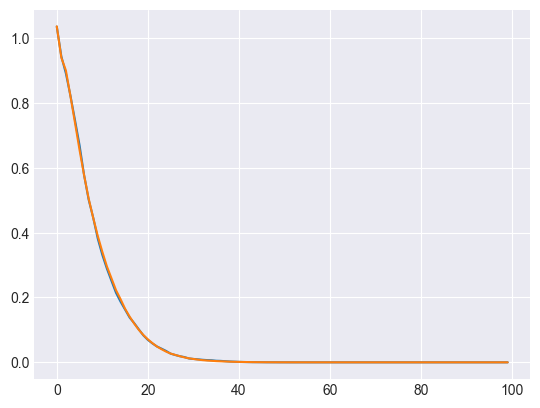

In [6]:
for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    for num_init_conds in num_init_cond_vals:
        plt.plot(s_diffs_per_time[L_val][num_init_conds], label=f"ICs = {num_init_conds}")

    plt.title(r"$S_{diff}(t)$")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$S_{diff}$")
    plt.legend()

    plt.show()